In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("Linear Regression/house_prices_additional_features.csv")

In [55]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Age,Price
0,1500,3,2,10,200000
1,2000,4,3,5,300000
2,1200,2,1,15,150000
3,2500,4,3,8,350000
4,1800,3,2,20,220000


In [57]:
# Taking Labels And Features as X, Y
X = np.array(df.drop("Price", axis="columns"))
Y = np.array(df["Price"])

In [58]:
X, Y

(array([[1500,    3,    2,   10],
        [2000,    4,    3,    5],
        [1200,    2,    1,   15],
        [2500,    4,    3,    8],
        [1800,    3,    2,   20],
        [3000,    5,    4,    2],
        [1400,    2,    1,   12],
        [2200,    4,    2,    7],
        [1600,    3,    2,    6],
        [1900,    3,    2,   25]], dtype=int64),
 array([200000, 300000, 150000, 350000, 220000, 450000, 180000, 280000,
        240000, 210000], dtype=int64))

In [187]:
class LinearRegression:
    def __init__(self, X, Y, alpha, epochs):
        self.X = X
        self.Y = Y
        self.alpha = alpha
        self.epochs = epochs
        self.W = np.zeros(X.shape[1])  # Initialize weights based on number of features
        self.b = 0
    
    def fit(self):
        X_scaled = self.X / self.X.max(axis=0)  # Scale features individually
        m = len(self.X)

        for i in range(self.epochs):
            y_pred = np.dot(X_scaled, self.W) + self.b  # Use dot product for prediction

            dw = (1/m) * np.dot(X_scaled.T, (y_pred - self.Y))
            db = (1/m) * np.sum(y_pred - self.Y)

            self.W = self.W - self.alpha * dw
            self.b = self.b - self.alpha * db

        self.W = self.W / self.X.max(axis=0)  # Normalize weights

    
    def coef__(self):
        return self.W
    
    def intercept__(self):
        return self.b
    
    def predict(self, X_test):
        return np.dot(X_test, self.W) + self.b, X_test
    
    def bestFitLine(self):
        Y_pred, X_test = self.predict(self.X)
        
        plt.scatter(X_test[:, 0], self.Y)  # Assuming X[:, 0] is the first feature
        plt.plot(X_test[:, 0], Y_pred)
        plt.show()
        
    def r_squared(self):
        y_pred, X_test = self.predict(self.X)
        ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
        ss_residual = np.sum((self.Y - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [188]:
model = LinearRegression(X, Y, 0.3, 10000)

In [189]:
model.fit()

In [190]:
model.predict(X)

(array([209108.16412303, 298724.69213134, 145678.95380277, 354274.08630586,
        215326.14050306, 447196.91432937, 181785.17153644, 280576.15927844,
        235427.02302787, 211888.29927106]),
 array([[1500,    3,    2,   10],
        [2000,    4,    3,    5],
        [1200,    2,    1,   15],
        [2500,    4,    3,    8],
        [1800,    3,    2,   20],
        [3000,    5,    4,    2],
        [1400,    2,    1,   12],
        [2200,    4,    2,    7],
        [1600,    3,    2,    6],
        [1900,    3,    2,   25]], dtype=int64))

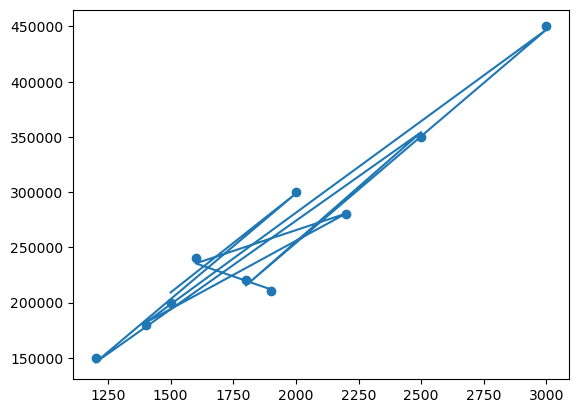

0.9975367900059409

In [195]:
model.bestFitLine()
model.r_squared()

In [192]:
# Assuming you have your trained model 'model' and new data 'X_new'
X_new = np.array([
    [1800, 3, 2, 12],
    [2200, 4, 3, 6],
    [1500, 2, 1, 8],
    [2800, 5, 4, 18],
    [1900, 3, 2, 15],
    [3200, 5, 3, 10],
    [2000, 3, 2, 20],
    [2400, 4, 2, 10],
    [1700, 2, 1, 5],
    [2600, 4, 3, 12]
])

predictions = model.predict(X_new)
print("Input Data (X_new):")
print(X_new)
print("\nPredicted Y Values:")
print(predictions)

Input Data (X_new):
[[1800    3    2   12]
 [2200    4    3    6]
 [1500    2    1    8]
 [2800    5    4   18]
 [1900    3    2   15]
 [3200    5    3   10]
 [2000    3    2   20]
 [2400    4    2   10]
 [1700    2    1    5]
 [2600    4    3   12]]

Predicted Y Values:
(array([241776.5406247 , 321605.70980419, 208104.03044128, 368108.79639804,
       244951.29942311, 409210.58138525, 241513.45819111, 296844.57692088,
       244210.24817495, 354142.54508907]), array([[1800,    3,    2,   12],
       [2200,    4,    3,    6],
       [1500,    2,    1,    8],
       [2800,    5,    4,   18],
       [1900,    3,    2,   15],
       [3200,    5,    3,   10],
       [2000,    3,    2,   20],
       [2400,    4,    2,   10],
       [1700,    2,    1,    5],
       [2600,    4,    3,   12]]))


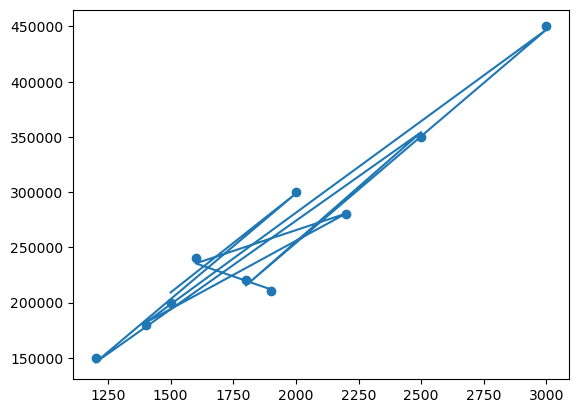

In [193]:
model.bestFitLine()

In [194]:
model.r_squared()

0.9975367900059409